In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tensorflow.keras import layers, models

In [2]:
data = pd.read_csv(r'DailyDelhiClimateTest.csv')

In [3]:
data.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [4]:
def preparar_datos_temperatura(data,secuencia):#funcion para cargar en esta parte los datos y la sencuencia
    #seleccionar los valores relevantes para la predicción
    data = data[['meantemp']].values
    #Guardar en x la secuencia y en y guardar el valor objetivo a analizar
    X,y = [],[]
    #función que me permita retornar con cada indice en x la secuencia y en y el valor objetivo
    for i in range(len(data)-secuencia): #Condición del for para asegurar que no se excedan los datos
        X.append(data[i:i+secuencia]) #creación de secuencias para tomar una subsecuencia
        y.append(data[i+secuencia]) #Tomar el valor siguiente de la secuencia como objetivo

    X = np.array(X) #convertir las secuencias en un arreglo
    y = np.array(y) #convertir los objetivos en un arreglo
    X = X.reshape(X.shape[0],X.shape[1],1) #Pasar en el X.shape[0] las muestras, en el X.shape[1] las secuencias y el 1 que es una unica caracteristica en este caso la temperataura media
    return X,y

secuencia = 4
X_climate, y_climate = preparar_datos_temperatura(data,secuencia)

In [5]:
X_climate.shape

(110, 4, 1)

In [6]:
y_climate.shape

(110, 1)

In [70]:
model_climate = models.Sequential([
    layers.Dense(220,activation='relu',input_shape=(secuencia,1)),

    layers.Dense(360,activation='relu'),
    layers.Dropout(0.375),

    layers.Dense(100,activation='relu'),
    layers.Dropout(0.3),

    layers.Dense(10,activation='relu'),
    layers.Dropout(0.2),

    layers.Dense(1)
])

In [71]:
model_climate.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])

In [72]:
historia_modelo_1 = model_climate.fit(X_climate,y_climate,epochs=100)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 301.4814 - mae: 15.0267
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 47.7131 - mae: 5.3531
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 55.5412 - mae: 5.7771 
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 58.2723 - mae: 6.1597
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 41.5058 - mae: 5.1491
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 46.7556 - mae: 5.3268
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 62.3165 - mae: 6.2639
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 46.5398 - mae: 5.3267 
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 43.5978 - mae: 4.9957
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 44.1277 - mae: 5.2766
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 48.5935 - mae: 5.3316 
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 43.6675 - mae: 5.2562
Epoch 13/100
4/4 ━━━━━━━━━━━━━━━━━━

In [73]:
model_climate.evaluate(X_climate,y_climate)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.8410 - mae: 2.1439  


[7.181833267211914, 2.214564561843872]

In [74]:
predicciones = model_climate.predict(X_climate)
print(predicciones)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
[[[15.677712 ]
  [18.043234 ]
  [16.77323  ]
  [18.226116 ]]

 [[18.043234 ]
  [16.77323  ]
  [18.226116 ]
  [17.941635 ]]

 [[16.77323  ]
  [18.226116 ]
  [17.941635 ]
  [18.791382 ]]

 [[18.226116 ]
  [17.941635 ]
  [18.791382 ]
  [14.576122 ]]

 [[17.941635 ]
  [18.791382 ]
  [14.576122 ]
  [15.468467 ]]

 [[18.791382 ]
  [14.576122 ]
  [15.468467 ]
  [14.450937 ]]

 [[14.576122 ]
  [15.468467 ]
  [14.450937 ]
  [12.201215 ]]

 [[15.468467 ]
  [14.450937 ]
  [12.201215 ]
  [11.185211 ]]

 [[14.450937 ]
  [12.201215 ]
  [11.185211 ]
  [11.907108 ]]

 [[12.201215 ]
  [11.185211 ]
  [11.907108 ]
  [13.22917  ]]

 [[11.185211 ]
  [11.907108 ]
  [13.229169 ]
  [13.1968975]]

 [[11.907108 ]
  [13.22917  ]
  [13.1968975]
  [16.154793 ]]

 [[13.22917  ]
  [13.1968975]
  [16.154793 ]
  [14.522782 ]]

 [[13.1968975]
  [16.154793 ]
  [14.522782 ]
  [11.845612 ]]

 [[16.154793 ]
  [14.522782 ]
  [11.845612 ]
  [13.052116 ]]

 [[14.522782 ]
  [11.845612 ]
  

In [75]:
predicciones_finales = predicciones[:,-1,0]

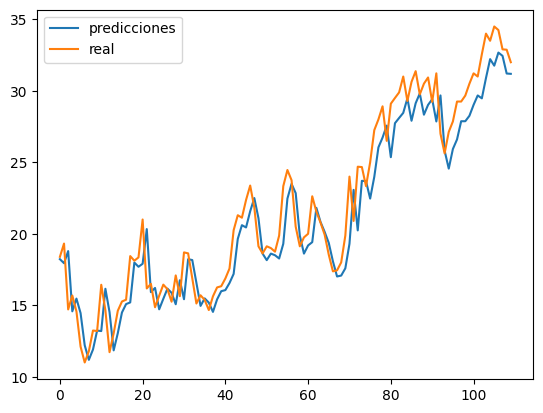

In [76]:
plt.plot(predicciones_finales,label='predicciones')
plt.plot(y_climate,label='real')
plt.legend()
plt.show()